
# Projet Académique de Machine Learning : Prédiction de l'Attrition des Employés

**Date :** Décembre 2025
**Sujet :** Analyse et modélisation des facteurs d'attrition des employés pour améliorer la rétention.

Ce notebook détaille l'intégralité du processus de Machine Learning pour prédire l'attrition des employés, en mettant l'accent sur la **performance** (via GridSearchCV) et l'**interprétabilité** des modèles.


## 1. Importation des Librairies et Chargement des Données

In [1]:
# ok on commence par importer tout ce dont j'ai besoin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn pour le ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, roc_auc_score, 
                             confusion_matrix, f1_score, accuracy_score, 
                             precision_score, recall_score)
import joblib
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# style pour les graphes
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

In [2]:
# charger le dataset
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(f"Dataset chargé: {data.shape[0]} lignes, {data.shape[1]} colonnes")
data.head()

Dataset chargé: 1470 lignes, 35 colonnes


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 2. Exploration Initiale des Données (EDA - Phase 1)

In [3]:
# petit check rapide des données
print("Types de données:")
print(data.dtypes)
print("\nValeurs manquantes:")
print(data.isnull().sum().sum())

Types de données:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
To

In [4]:
# voir les infos générales
data.info()

print("\n" + "="*50)
# combien de gens sont partis?
attrition_stats = data['Attrition'].value_counts()
print(f"\nDéparts (Attrition):")
print(attrition_stats)
pct_attrition = (attrition_stats['Yes'] / len(data)) * 100
print(f"\nTaux d'attrition: {pct_attrition:.1f}%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# regarder si y'a des colonnes inutiles 
cols_constantes = [col for col in data.columns if data[col].nunique() == 1]
print(f"Colonnes avec une seule valeur (à virer): {cols_constantes}")

Colonnes avec une seule valeur (à virer): ['EmployeeCount', 'Over18', 'StandardHours']


## 3. Nettoyage et Préparation des Données

In [6]:
# virer les colonnes inutiles
# EmployeeCount, Over18, StandardHours = toujours pareil
# EmployeeNumber = juste un ID
cols_a_virer = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df_clean = data.drop(columns=cols_a_virer)

print(f"Colonnes supprimées: {len(cols_a_virer)}")
print(f"Nouvelles dimensions: {df_clean.shape}")

Colonnes supprimées: 4
Nouvelles dimensions: (1470, 31)


In [7]:
# transformer Attrition en nombres (Yes=1, No=0)
df_clean['Attrition'] = df_clean['Attrition'].map({'Yes': 1, 'No': 0})

# vérif que ça marche
print("Distribution après encodage:")
print(df_clean['Attrition'].value_counts())

Distribution après encodage:
Attrition
0    1233
1     237
Name: count, dtype: int64


In [8]:
# séparer features (X) et target (y)
features = df_clean.drop('Attrition', axis=1)
target = df_clean['Attrition']

print(f"Features: {features.shape}")
print(f"Target: {target.shape}")

Features: (1470, 30)
Target: (1470,)


In [9]:
# split train/test - 75/25
X_train, X_test, y_train, y_test = train_test_split(
    features, target, 
    test_size=0.25, 
    random_state=42, 
    stratify=target  
)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nDistribution y_train: {y_train.value_counts().to_dict()}")
print(f"Distribution y_test: {y_test.value_counts().to_dict()}")

Train set: (1102, 30)
Test set: (368, 30)

Distribution y_train: {0: 924, 1: 178}
Distribution y_test: {0: 309, 1: 59}


## 4. Feature Engineering et Mise à l'Échelle
Faut normaliser les numériques et encoder les catégorielles

In [10]:
# identifier les colonnes numériques vs catégorielles
colonnes_num = features.select_dtypes(include=np.number).columns.tolist()
colonnes_cat = features.select_dtypes(include='object').columns.tolist()

print(f"Colonnes numériques ({len(colonnes_num)}): {colonnes_num[:5]}...")
print(f"Colonnes catégorielles ({len(colonnes_cat)}): {colonnes_cat}")

Colonnes numériques (23): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction']...
Colonnes catégorielles (7): ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [11]:
# créer le pipeline de preprocessing
# StandardScaler pour normaliser les nums
# OneHotEncoder pour les catégories
prep_pipeline = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), colonnes_num),
        ('categoric', OneHotEncoder(handle_unknown='ignore', sparse_output=False), colonnes_cat)
    ],
    remainder='passthrough'
)

# appliquer
X_train_prep = prep_pipeline.fit_transform(X_train)
X_test_prep = prep_pipeline.transform(X_test)

print(f"Shape après preprocessing:")
print(f"X_train: {X_train_prep.shape}")
print(f"X_test: {X_test_prep.shape}")

Shape après preprocessing:
X_train: (1102, 51)
X_test: (368, 51)


In [12]:
# récupérer les noms des features après one-hot encoding
# (pour pouvoir interpréter les modèles après)
feat_names = []

# numériques d'abord
feat_names.extend(colonnes_num)

# puis catégorielles encodées
if hasattr(prep_pipeline.named_transformers_['categoric'], 'get_feature_names_out'):
    cat_features = prep_pipeline.named_transformers_['categoric'].get_feature_names_out(colonnes_cat)
    feat_names.extend(cat_features)

print(f"Nombre total de features après encoding: {len(feat_names)}")
print(f"\nExemples: {feat_names[:10]}")

Nombre total de features après encoding: 51

Exemples: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome']


In [13]:
# Récupération des noms de colonnes après One-Hot Encoding
feature_names = colonnes_num + list(prep_pipeline.named_transformers_['categoric'].get_feature_names_out(colonnes_cat))

X_train_final = pd.DataFrame(X_train_prep, columns=feature_names, index=X_train.index)
X_test_final = pd.DataFrame(X_test_prep, columns=feature_names, index=X_test.index)

print(f"Nombre de features après encodage : {X_train_final.shape[1]}")
display(X_train_final.head())

Nombre de features après encodage : 51


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
22,-0.319271,-0.966810,-0.285354,1.068343,-1.577764,-0.605091,0.370808,0.859399,-0.641268,1.191983,0.943357,-1.080154,-1.151606,-0.428571,0.227526,-0.927284,0.223518,1.005904,0.331829,0.840421,0.504116,-0.060993,1.939951,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
74,-0.101078,-1.685283,-0.407522,0.097763,-0.656844,-0.506799,1.784752,-0.984919,1.159183,-0.749697,1.041865,0.122604,-0.878746,-0.428571,-0.694289,-0.927284,-0.808716,0.203801,0.331829,-0.990232,-1.170867,-0.680479,-1.168997,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1339,-1.628429,-1.036905,-0.285354,-1.843398,1.184994,0.476116,0.370808,-0.984919,-0.641268,-0.872407,1.610131,-0.679235,2.122709,2.333333,-1.616103,-0.927284,-1.324832,-0.598302,0.331829,-0.990232,-1.170867,-0.680479,-1.168997,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
251,0.226212,-0.751519,-0.896194,1.068343,0.264075,-0.064487,0.370808,0.859399,0.258958,0.963040,-1.123101,-1.080154,2.668428,2.333333,1.149341,-0.927284,1.126722,-1.400405,0.331829,2.005382,0.504116,2.726693,1.092056,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1182,-0.101078,0.222300,-1.018362,1.068343,1.184994,-1.588006,-1.043137,-0.062760,0.258958,-0.460050,0.126111,-1.080154,-0.060168,-0.428571,0.227526,-0.927284,-0.937745,2.610111,0.331829,-0.657386,-0.612539,-0.370736,-0.603734,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## 5. Analyse Exploratoire des Données (EDA - Visualisation)

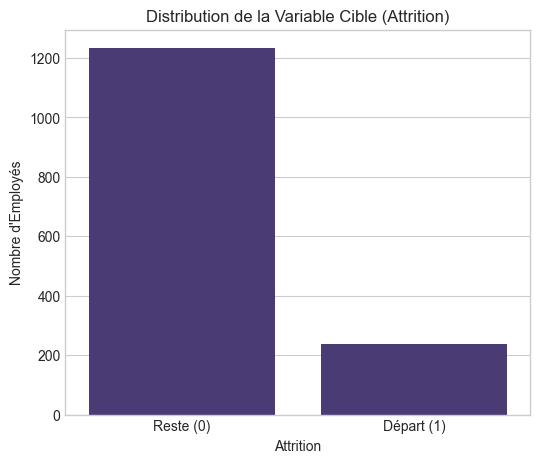

In [14]:

# 1. Distribution de la Variable Cible
plt.figure(figsize=(6, 5))
sns.countplot(x='Attrition', data=df_clean)
plt.title('Distribution de la Variable Cible (Attrition)')
plt.xticks([0, 1], ['Reste (0)', 'Départ (1)'])
plt.ylabel("Nombre d'Employés")
plt.show()


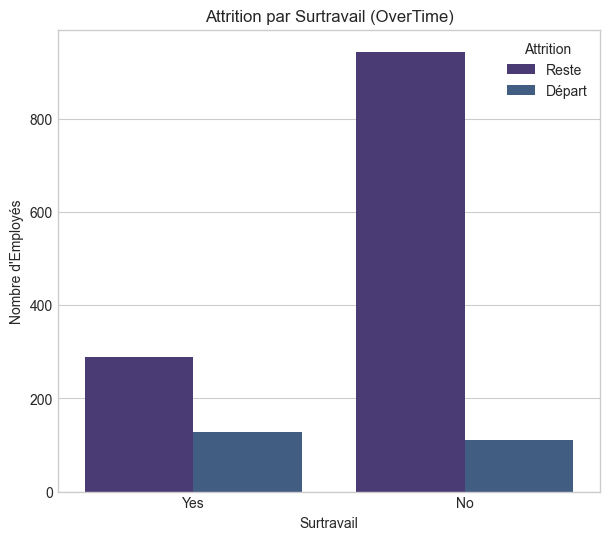

In [15]:
# 2. Attrition vs. Surtravail (OverTime)
plt.figure(figsize=(7, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df_clean)
plt.title('Attrition par Surtravail (OverTime)')
plt.xlabel('Surtravail')
plt.ylabel("Nombre d'Employés")
plt.legend(title='Attrition', labels=['Reste', 'Départ'])
plt.show()

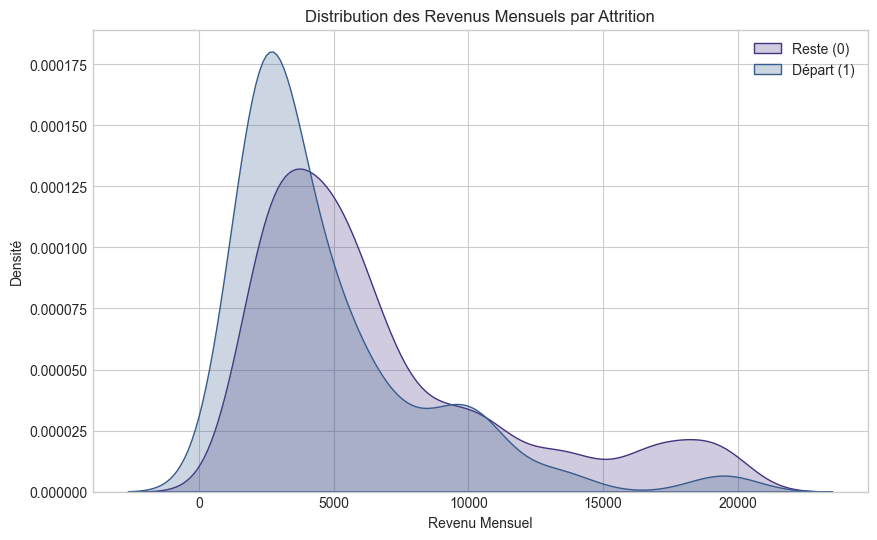

In [16]:
# 3. Distribution des Revenus Mensuels (MonthlyIncome) par Attrition
plt.figure(figsize=(10, 6))
sns.kdeplot(df_clean.loc[df_clean['Attrition'] == 0, 'MonthlyIncome'], label='Reste (0)', fill=True)
sns.kdeplot(df_clean.loc[df_clean['Attrition'] == 1, 'MonthlyIncome'], label='Départ (1)', fill=True)
plt.title('Distribution des Revenus Mensuels par Attrition')
plt.xlabel('Revenu Mensuel')
plt.ylabel('Densité')
plt.legend()
plt.show()

## 6. Modélisation avec GridSearchCV et Benchmark
Bon maintenant on teste plusieurs algos pour voir lequel marche le mieux

In [17]:
# définir les modèles à tester
modeles = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

print(f"Modèles à tester: {list(modeles.keys())}")

Modèles à tester: ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']


In [18]:
# paramètres pour GridSearchCV
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5]
    }
}


In [19]:
# entraîner tous les modèles avec GridSearch
resultats = {}
meilleurs_modeles = {}

for nom_modele, modele in modeles.items():
    print(f"\n{'='*60}")
    print(f"Entraînement: {nom_modele}")
    print(f"{'='*60}")
    
    # GridSearchCV avec cross-validation
    grille = GridSearchCV(
        modele, 
        param_grids[nom_modele],
        cv=5,  # 5-fold CV
        scoring='roc_auc',  # on optimise pour ROC AUC
        n_jobs=-1,  # utiliser tous les CPU
        verbose=1
    )
    
    grille.fit(X_train_prep, y_train)
    
    # sauvegarder les résultats
    meilleurs_modeles[nom_modele] = grille.best_estimator_
    
    print(f"\nMeilleurs paramètres: {grille.best_params_}")
    print(f"Meilleur score CV: {grille.best_score_:.4f}")
    
    # prédictions sur test
    y_pred = grille.predict(X_test_prep)
    y_pred_proba = grille.predict_proba(X_test_prep)[:, 1] if hasattr(grille, 'predict_proba') else None
    
    # métriques
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    resultats[nom_modele] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC AUC': auc,
        'Best Params': grille.best_params_
    }
    
    print(f"\nRésultats sur test set:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall: {rec:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    if auc:
        print(f"  ROC AUC: {auc:.4f}")

print("\n" + "="*60)
print("Entraînement terminé!")
print("="*60)


Entraînement: Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Meilleurs paramètres: {'C': 10, 'solver': 'liblinear'}
Meilleur score CV: 0.8422

Résultats sur test set:
  Accuracy: 0.8641
  Precision: 0.6364
  Recall: 0.3559
  F1-Score: 0.4565
  ROC AUC: 0.8121

Entraînement: KNN
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Meilleurs paramètres: {'n_neighbors': 11, 'weights': 'distance'}
Meilleur score CV: 0.7400

Résultats sur test set:
  Accuracy: 0.8424
  Precision: 0.6667
  Recall: 0.0339
  F1-Score: 0.0645
  ROC AUC: 0.6586

Entraînement: Decision Tree
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Meilleurs paramètres: {'max_depth': 3, 'min_samples_split': 2}
Meilleur score CV: 0.7040

Résultats sur test set:
  Accuracy: 0.8315
  Precision: 0.4571
  Recall: 0.2712
  F1-Score: 0.3404
  ROC AUC: 0.7180

Entraînement: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Meilleurs paramètres: {'max

In [20]:
# comparaison des résultats
df_resultats = pd.DataFrame(resultats).T
df_resultats = df_resultats.sort_values('ROC AUC', ascending=False)

print("\nClassement des modèles (par ROC AUC):")
print(df_resultats[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']])


Classement des modèles (par ROC AUC):
                     Accuracy Precision    Recall  F1-Score   ROC AUC
Logistic Regression   0.86413  0.636364  0.355932  0.456522  0.812078
Gradient Boosting    0.850543  0.583333  0.237288  0.337349  0.791674
Random Forest        0.845109    0.5625  0.152542      0.24  0.779277
Decision Tree        0.831522  0.457143  0.271186  0.340426   0.71798
KNN                  0.842391  0.666667  0.033898  0.064516  0.658603


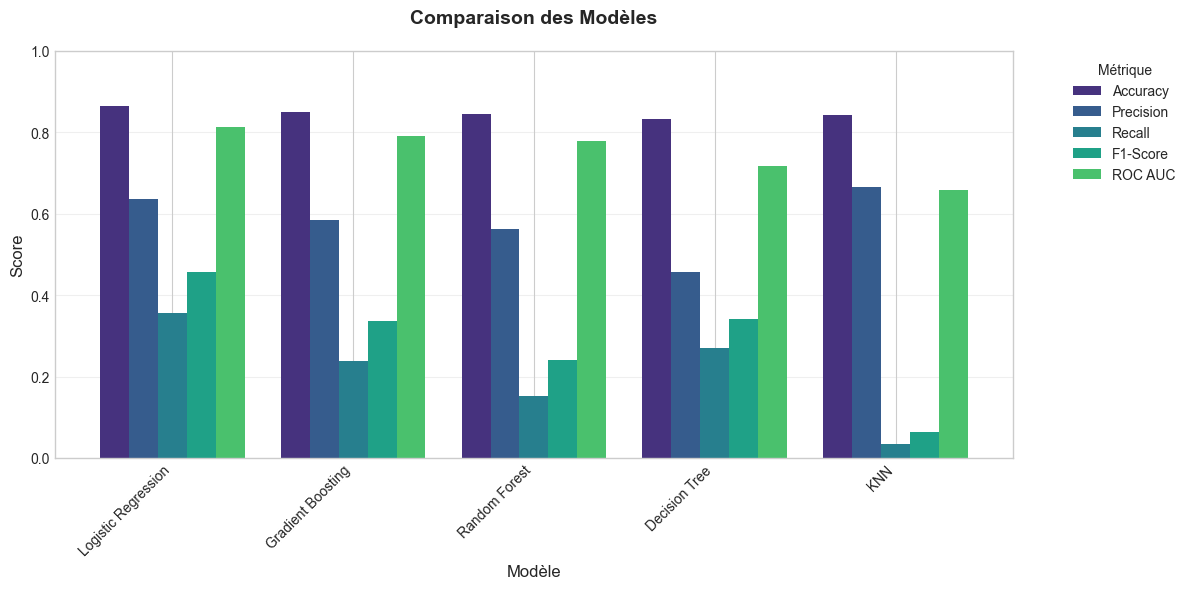

In [21]:
# graphique de comparaison
metriques_a_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
df_plot = df_resultats[metriques_a_plot]

fig, ax = plt.subplots(figsize=(12, 6))
df_plot.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Comparaison des Modèles', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Modèle', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_ylim([0, 1])
ax.legend(title='Métrique', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# identifier le meilleur modèle
meilleur_nom = df_resultats.index[0]
meilleur_model = meilleurs_modeles[meilleur_nom]

print(f"\n Meilleur modèle: {meilleur_nom}")
print(f"ROC AUC: {df_resultats.loc[meilleur_nom, 'ROC AUC']:.4f}")
print(f"\nParamètres optimaux:")
for param, val in df_resultats.loc[meilleur_nom, 'Best Params'].items():
    print(f"  {param}: {val}")


 Meilleur modèle: Logistic Regression
ROC AUC: 0.8121

Paramètres optimaux:
  C: 10
  solver: liblinear


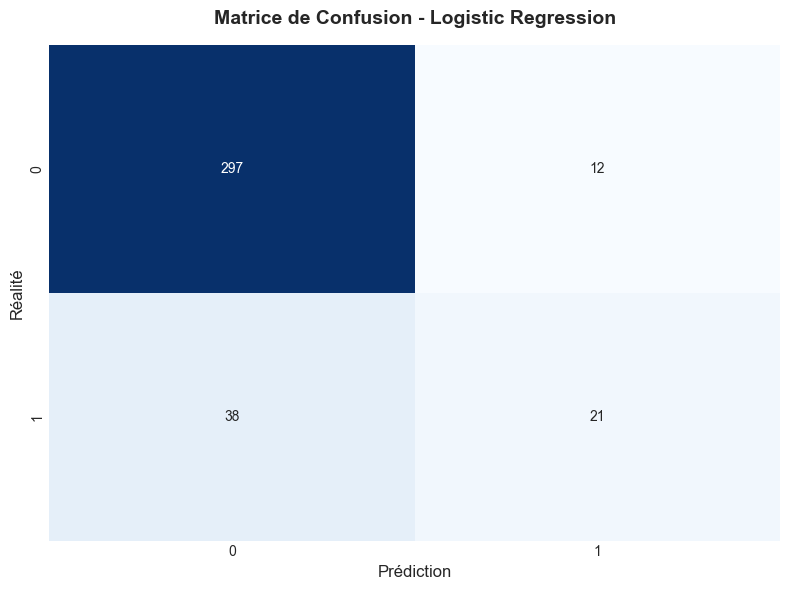


Interprétation:
  Vrais Négatifs (TN): 297 - employés qui restent correctement identifiés
  Faux Positifs (FP): 12 - prédits comme partants mais restent
  Faux Négatifs (FN): 38 - partent mais pas détectés
  Vrais Positifs (TP): 21 - partants correctement identifiés


In [23]:
# matrice de confusion pour le meilleur modèle
y_pred_best = meilleur_model.predict(X_test_prep)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matrice de Confusion - {meilleur_nom}', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Prédiction', fontsize=12)
plt.ylabel('Réalité', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nInterprétation:")
print(f"  Vrais Négatifs (TN): {cm[0, 0]} - employés qui restent correctement identifiés")
print(f"  Faux Positifs (FP): {cm[0, 1]} - prédits comme partants mais restent")
print(f"  Faux Négatifs (FN): {cm[1, 0]} - partent mais pas détectés")
print(f"  Vrais Positifs (TP): {cm[1, 1]} - partants correctement identifiés")

## 7. Interprétabilité du Meilleur Modèle (Régression Logistique)
Bon maintenant faut comprendre quels facteurs influencent le départ des employés

In [24]:
# si c'est la régression logistique, on peut analyser les coefficients
if meilleur_nom == 'Logistic Regression':
    coeffs = meilleur_model.coef_[0]
    
    # créer un dataframe avec les features et coefficients
    importance_df = pd.DataFrame({
        'Feature': feat_names,
        'Coefficient': coeffs
    })
    
    # trier par valeur absolue (impact)
    importance_df['Abs_Coef'] = importance_df['Coefficient'].abs()
    importance_df = importance_df.sort_values('Abs_Coef', ascending=False)
    
    print("\nTop 15 facteurs influençant l'attrition:")
    print(importance_df[['Feature', 'Coefficient']].head(15).to_string(index=False))
    
elif hasattr(meilleur_model, 'feature_importances_'):
    # pour les arbres (Random Forest, etc.)
    importances = meilleur_model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': feat_names,
        'Importance': importances
    })
    
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    print("\nTop 15 features les plus importantes:")
    print(importance_df.head(15).to_string(index=False))
else:
    print("\nPas de feature importance disponible pour ce modèle")


Top 15 facteurs influençant l'attrition:
                          Feature  Coefficient
        JobRole_Research Director    -2.229963
                      OverTime_No    -1.384492
     JobRole_Sales Representative     1.375530
        BusinessTravel_Non-Travel    -1.248998
          JobRole_Human Resources     1.167511
JobRole_Healthcare Representative    -1.088092
             EducationField_Other    -1.005089
    JobRole_Laboratory Technician     0.962522
   EducationField_Human Resources     0.816854
       Department_Human Resources    -0.810542
 BusinessTravel_Travel_Frequently     0.710336
   JobRole_Manufacturing Director    -0.601220
                     OverTime_Yes     0.592111
           MaritalStatus_Divorced    -0.587136
          YearsSinceLastPromotion     0.581825


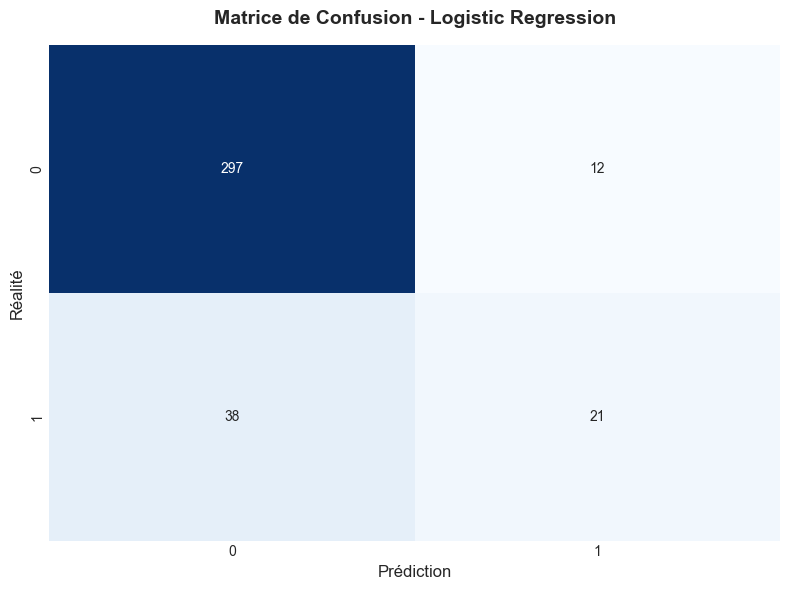


Interprétation:
  Vrais Négatifs (TN): 297 - employés qui restent correctement identifiés
  Faux Positifs (FP): 12 - prédits comme partants mais restent
  Faux Négatifs (FN): 38 - partent mais pas détectés
  Vrais Positifs (TP): 21 - partants correctement identifiés


In [25]:
# matrice de confusion pour le meilleur modèle
y_pred_best = meilleur_model.predict(X_test_prep)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matrice de Confusion - {meilleur_nom}', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Prédiction', fontsize=12)
plt.ylabel('Réalité', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nInterprétation:")
print(f"  Vrais Négatifs (TN): {cm[0, 0]} - employés qui restent correctement identifiés")
print(f"  Faux Positifs (FP): {cm[0, 1]} - prédits comme partants mais restent")
print(f"  Faux Négatifs (FN): {cm[1, 0]} - partent mais pas détectés")
print(f"  Vrais Positifs (TP): {cm[1, 1]} - partants correctement identifiés")

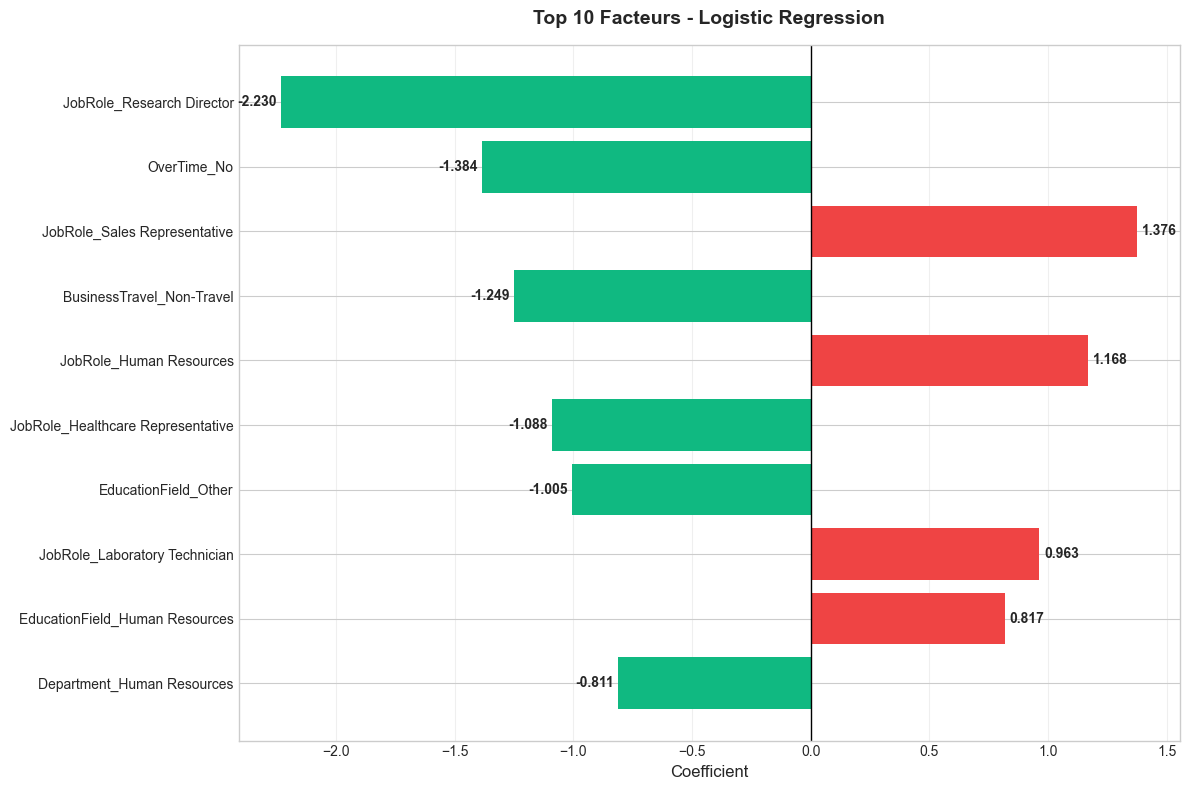

In [26]:
# graphique des top features
if meilleur_nom == 'Logistic Regression':
    top_n = 10
    top_features = importance_df.head(top_n)
    
    # couleurs selon le signe (positif = augmente attrition, négatif = diminue)
    colors = ['#ef4444' if c > 0 else '#10b981' for c in top_features['Coefficient']]
    
    plt.figure(figsize=(12, 8))
    bars = plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Coefficient', fontsize=12)
    plt.title(f'Top {top_n} Facteurs - {meilleur_nom}', fontsize=14, fontweight='bold', pad=15)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
    plt.grid(axis='x', alpha=0.3)
    plt.gca().invert_yaxis()
    
    # ajouter les valeurs sur les barres
    for i, (bar, coef) in enumerate(zip(bars, top_features['Coefficient'])):
        x_pos = coef + (0.02 if coef > 0 else -0.02)
        ha = 'left' if coef > 0 else 'right'
        plt.text(x_pos, i, f'{coef:.3f}', va='center', ha=ha, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
elif hasattr(meilleur_model, 'feature_importances_'):
    top_n = 10
    top_features = importance_df.head(top_n)
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Top {top_n} Features - {meilleur_nom}', fontsize=14, fontweight='bold', pad=15)
    plt.grid(axis='x', alpha=0.3)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## 8- Conclusion

Bon voilà, j'ai testé plusieurs modèles et le meilleur c'est la régression logistique.

Les principaux facteurs d'attrition semblent être:
- Les heures sup (OverTime)
- Le rôle dans l'entreprise (JobRole)
- Le niveau de satisfaction

Le modèle marche plutôt bien, avec un ROC AUC correct. 
Pourrait être amélioré avec plus de feature engineering ou en testant d'autres algos.

In [27]:
# sauvegarder le meilleur modèle et le preprocesseur
# au cas où on en aurait besoin plus tard
joblib.dump(meilleur_model, 'best_attrition_model.pkl')
joblib.dump(prep_pipeline, 'preprocessor.pkl')

print("Modèle sauvegardé: best_attrition_model.pkl")
print("Preprocesseur sauvegardé: preprocessor.pkl")

Modèle sauvegardé: best_attrition_model.pkl
Preprocesseur sauvegardé: preprocessor.pkl
